In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as  tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np

In [2]:
#Вводим данные для обучения модели
degrees = np.array([0, 30, 45, 60, 90, 180, 360], dtype=float)
radians = np.array([0, 0.52, 0.79, 1.05, 1.57, 3.14, 6.28], dtype=float)

for i,c in enumerate(degrees):
  print("{} градусов = {} радиан".format(c, radians[i]))

0.0 градусов = 0.0 радиан
30.0 градусов = 0.52 радиан
45.0 градусов = 0.79 радиан
60.0 градусов = 1.05 радиан
90.0 градусов = 1.57 радиан
180.0 градусов = 3.14 радиан
360.0 градусов = 6.28 радиан


Содаем модель
Используем модель плотной сети (Dense-сеть),
которая будет состоять из единственного слоя с единственым нейроном

Создаем слой l0 количество нейронов (units) равно 1,
размерность входного параметра (input_shape) - единичное значение
разменость входных данных = размерность всей модели

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [4]:
# Преобразуем слой в модель
model = tf.keras.Sequential([l0])

Компилируем модель с функцией потерь и оптимизаций
Функция потерь - среденквадратичная ошибка
Для функции оптимизации параметр, коэффициент скорости обучения, равен 0.1 - это размер шага при корректировке внутренних значений переменных

In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Тренируем модель
используем метод fit, первый аргумент - входные значения, второй арумент - желаемые выходные значения
epochs - количество итераций цыкла обучения
verbose - контроль уровня логирования

Завершили тренировку модели


<function matplotlib.pyplot.show(close=None, block=None)>

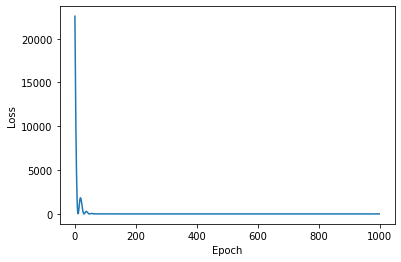

In [6]:
history = model.fit(degrees, radians, epochs=1000, verbose=False)
print("Завершили тренировку модели")

# Выводим график обучения
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show

Тесты:

In [7]:
degrees_test = np.array([23, 47, 11, 164, 152, 83, 53], dtype=float)

for i in degrees_test:
    print(model.predict([i]))

[[0.40050036]]
[[0.8193004]]
[[0.19110031]]
[[2.8609507]]
[[2.6515508]]
[[1.4475005]]
[[0.92400044]]


In [8]:
#degrees_test = np.array([23, 47, 11, 164, 152, 83, 53], dtype=float) 
radians_test = np.array([0.4, 0.82, 0.19, 2.86, 2.65, 1.45, 0.93], dtype=float) 

for i in range(7): 
    print(model.predict([degrees_test[i]]) - radians_test[i])

[[0.00050035]]
[[-0.00069958]]
[[0.00110032]]
[[0.00095081]]
[[0.00155067]]
[[-0.00249958]]
[[-0.00599957]]
